# Assignment 2

## Question 1 [15 Pts]:

Suppose data $\{x_i\}_{i = 1}^{i = n}$ is drawn from a normal distribution of _known_ standard deviation $\sigma$ and _unknown_ mean $\mu$
- Derive the MLE estimate $\mu_{\text{MLE}}$
- Derive the MAP estimate $\mu_{\text{MAP}}$ assuming the prior is also a normal distribution with mean $\tau$ and standard deviation $\omega$. What happens as $n \rightarrow \infty$?


## Answer:

For MLE, we have that the likelihood is given by
\begin{align}
    \mathbb{P}(\{x_i\}_{i = 1}^{i = n} | \mu) &= \prod_{i = 1}^{i = n} \mathbb{P}(x_i | \mu) \\
    &= \prod_{i = 1}^{i = n} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(-\frac{(x_i - \mu)^2}{2 \sigma^2}) \\
\implies \log(\mathbb{P}(\{x_i\}_{i = 1}^{i = n} | \mu)) &= \sum_{i = 1}^{i = n} \left[\log(\frac{1}{\sqrt{2 \pi \sigma^2}}) - \frac{(x_i - \mu)^2}{2 \sigma^2}\right] \text{(since log is monotonically increasing)}
\end{align}

Taking derivatives of this w.r.t $\mu$, and setting to zero, we get
\begin{align}
    \sum_{i = 1}^{i = n} \frac{(x_i - \mu)}{\sigma^2} &= 0 \\
    \implies \mu_{\text{MLE}} &= \frac{\sum_{i = 1}^{i = n} x_i}{n}
\end{align}

For MAP, we can use Bayes rule to write
\begin{align}
    \mathbb{P}(\mu | \{x_i\}_{i = 1}^{i = n}) = \frac{\mathbb{P}(\{x_i\}_{i = 1}^{i = n} | \mu)\mathbb{P}(\mu)}{\mathbb{P}(\{x_i\}_{i = 1}^{i = n})}
\end{align}

We are given the prior
\begin{align}
    \mathbb{P}(\mu) = \frac{1}{\sqrt{2 \pi \omega^2}} \exp(-\frac{(\mu - \tau)^2}{2 \omega^2})
\end{align}

Plugging this in, and taking the derivative of $\log(\mathbb{P}(\mu | \{x_i\}_{i = 1}^{i = n}))$ w.r.t $\mu$, and setting to zero, we get
\begin{align}
    \sum_{i = 1}^{i = n} \left(\frac{(x_i - \mu)}{\sigma^2}\right) - \frac{\mu - \tau}{\omega^2}= 0 \\
    \implies \mu_{\text{MAP}} = \frac{\omega^2 \sum_{i = 1}^{i = n} x_i + \sigma^2 \tau}{(n\omega^2 + \sigma^2)}
\end{align}

AS $n \rightarrow \infty$, and the MAP estimate becomes the MLE estimate.


## Question 2 [30 Pts]:

Consider a Bayesian linear regression model where the outputs $y$ are distributed according to a Gaussian likelihood $p(y\lvert x, \alpha, \beta, \gamma)$ corresponding to a linear model $y = \alpha x + \beta + \epsilon$. Here $\gamma$ represents the noise level in the observed data, i.e. it corresponds to the precision of the data likelihood. In this case, the likelihood can be further expressed as:

$$p(y\lvert x, \alpha, \beta, \gamma) = (\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})$$

In a Bayesian setting we would like to assume prior distributions on the unknown parameters $\alpha$, $\beta$ and $\gamma$. Here we assume $p(\alpha) = \mathcal{N}(\mu_{\alpha}, \sigma_{\alpha})$, $p(\beta) = \mathcal{N}(\mu_{\beta}, \sigma_{\beta})$ and $p(\gamma) = \textrm{Gam}(\tau, \omega)$ is a Gamma distribution.

Please write down the posterior conditional distribution for each of those parameters, i.e.,

$p(\alpha\lvert x, y, \beta, \gamma)$

$p(\beta\lvert x, y, \alpha, \gamma)$

$p(\gamma\lvert x, y, \alpha, \beta)$

Comment on your results.

[**HINT**: Might be easier to work with the $\log$ of the posterior, and "complete the square" to identify the distribution]


## Answer:

We have that
\begin{align}
    p(\alpha\lvert x, y, \beta, \gamma) &\propto p(y\lvert x, \alpha, \beta, \gamma) p(\alpha) \\
\implies \log(p(\alpha\lvert x, y, \beta, \gamma)) &\propto \log(p(y\lvert x, \alpha, \beta, \gamma) p(\alpha)) \\
                                                   &\propto \log(p(y\lvert x, \alpha, \beta, \gamma)) + \log(p(\alpha)) \\
                                        &\propto \log\left(\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})\right) + \log\left(\frac{1}{\sqrt{2 \pi}} \exp(-\frac{(\alpha - \mu_{\alpha})^2}{2\sigma_{\alpha}^2})\right) \\
                                        &\propto (-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})-\frac{(\alpha - \mu_{\alpha})^2}{2\sigma_{\alpha}^2} \\
                                        &\propto (-\frac{1 + \gamma \sum_{i=1}^n x_i^2}{2})\alpha^2 + \gamma (\sum_{i=1}^n (x_i y_i - x_i \beta)) \alpha \\
                                        &\propto -\left((\frac{1 + \gamma \sum_{i=1}^n x_i^2}{2})\alpha^2 - \gamma (\sum_{i=1}^n (x_i y_i - x_i \beta)) \alpha \right) \\
                                        &\propto -\frac{1 + \gamma \sum_{i=1}^n x_i^2}{2} (\alpha - \frac{\gamma \sum_{i=1}^n (x_i y_i - x_i \beta)}{1 + \gamma \sum_{i=1}^n x_i^2})^2 \\
                                        &\propto \log(\mathcal{N}(\frac{\gamma (\sum_{i=1}^n (x_i y_i - x_i \beta))}{1 + \gamma \sum_{i=1}^n x_i^2}, \frac{1}{1 + \gamma \sum_{i=1}^n x_i^2})) \\
\implies p(\alpha\lvert x, y, \beta, \gamma) &= \mathcal{N}\left(\frac{\gamma (\sum_{i=1}^n (x_i y_i - x_i \beta))}{1 + \gamma \sum_{i=1}^n x_i^2}, \frac{1}{1 + \gamma \sum_{i=1}^n x_i^2}\right)
\end{align}

Similarly, we have

\begin{align}
    p(\beta\lvert x, y, \alpha, \gamma) &\propto p(y\lvert x, \alpha, \beta, \gamma) p(\beta) \\
\implies \log(p(\beta\lvert x, y, \alpha, \gamma)) &\propto \log(p(y\lvert x, \alpha, \beta, \gamma) p(\beta)) \\
                                                   &\propto \log(p(y\lvert x, \alpha, \beta, \gamma)) + \log(p(\beta)) \\
                                        &\propto \log\left(\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})\right) + \log\left(\frac{1}{\sqrt{2 \pi}} \exp(-\frac{\beta^2}{2})\right) \\
                                        &\propto (-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})-\frac{\beta^2}{2} \\
                                        &\propto (-\frac{1 + n \gamma}{2})\beta^2 + \gamma (\sum_{i=1}^n (y_i - x_i \alpha)) \beta \\
                                        &\propto -\left((\frac{1 + n \gamma}{2})\beta^2 - \gamma (\sum_{i=1}^n (y_i - x_i \alpha)) \beta \right) \\
                                        &\propto -\frac{1 + n \gamma}{2} (\beta - \frac{\gamma \sum_{i=1}^n (y_i - x_i \alpha)}{1 + n \gamma})^2 \\
                                        &\propto \log(\mathcal{N}(\frac{\gamma (\sum_{i=1}^n (y_i - x_i \alpha))}{1 + \gamma}, \frac{1}{1 + \gamma})) \\
\implies p(\beta\lvert x, y, \alpha, \gamma) &= \mathcal{N}\left(\frac{\gamma (\sum_{i=1}^n (y_i - x_i \alpha))}{1 + n\gamma}, \frac{1}{1 + n\gamma}\right)
\end{align}

Finally, we have

\begin{align}
    p(\gamma\lvert x, y, \alpha, \beta) &\propto p(y\lvert x, \alpha, \beta, \gamma) p(\gamma) \\
\implies \log(p(\gamma\lvert x, y, \alpha, \beta)) &\propto \log(p(y\lvert x, \alpha, \beta, \gamma) p(\gamma)) \\
                                                   &\propto \log(p(y\lvert x, \alpha, \beta, \gamma)) + \log(p(\gamma)) \\
                                        &\propto \log\left(\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})\right) + \log\left( \gamma \exp(-\gamma)\right) \\
                                        &\propto (\frac{n}{2} + 1) \log(\gamma) + (-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})-\gamma -\frac{n}{2} \log(2 \pi) \\
                                        &\propto (\frac{n}{2} + 1) \log(\gamma) - \left(\frac{(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2} + 1\right)\gamma
\end{align}


We have that $\log(\mathrm{Gam}(\alpha, \beta)(\gamma)) = \alpha \log(\beta) + (\alpha - 1) \log(\gamma) - \gamma \beta - \log(\Gamma (\alpha))$. By comparing with the above expression, we may infer that

\begin{align}
    p(\gamma\lvert x, y, \alpha, \beta) = \mathrm{Gam}\left(\frac{n}{2} + 2, 1 + \frac{1}{2} \sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2\right)
\end{align}

## Question 3 [15 Pts]:

Consider the Bayesian linear regression model with
$$p(y\mid x,w) = \mathcal{N}(y\mid w^{T}\phi(x),\alpha^{-1}I), \ p(w)=\mathcal{N}(w\mid 0,\beta^{-1}I),$$

with $\alpha = 0.5, \beta  = 0.1$. Generate a set of $N = 400$ noisy observations by uniformly sampling

$$y(x) = \sin(\pi x) + \sin(2 \pi x) + \sin(5 \pi x)\quad x\in[-1,1]$$

Once you've created the observations, perturb the data with a normal distribution with standard deviation set to 10% of the data. Compute the MLE and MAP estimates for the weights $w$ using different types and numbers of features $\phi(x)$:
- Monomial basis: $\phi(x) = \{1, x, x^2, x^3, \dots, x^M\}$
- Fourier basis: $\phi(x) = \{0, 1, \sin(\pi x), \cos(\pi x), \sin(2\pi x), \cos(2\pi x), \dots, \sin(M\pi x), \cos(M\pi x)\}$ (this case has a total of $2M$ features)
- [Legendre](https://en.wikipedia.org/wiki/Legendre_polynomials) basis: $\{P_0(x), P_1(x), P_2(x), P_3(x), \dots, P_M(x)\}$, where $P_0(x) = 1, P_1(x) = x$, and subsequent polynomials can be generated by the recursion $(n + 1) P_{n+1} (x) = (2n + 1) x P_n(x) - n P_{n - 1}(x).$

For the case $M=5$, plot the data, the mean predictions corresponding to the MLE and MAP estimates for $w$, and $100$ samples from the predictive posterior distribution.
Which set of features works best for this function and why?

## Answer:

We are given the likelihoods and priors
\begin{align}
    p(y\lvert x,w) = \mathcal{N}(y\mid w^{T}\phi(x),\alpha^{-1}I), \ p(w)=\mathcal{N}(w\mid 0,\beta^{-1}I), \ \alpha=5, \beta = 0.1
\end{align}

We will construct a basis functions matrix as an $(N \times m)$ matrix $\Phi$, where m denotes the chosen order for the basis.
\begin{align}
    \Phi =
    \begin{bmatrix}
    \phi_1(x_1) & \phi_2(x_1) & \phi_3(x_1) & \dots  & \phi_m(x_1) \\
    \phi_1(x_2) & \phi_2(x_2) & \phi_3(x_2) & \dots  & \phi_m(x_2) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \phi_1(x_N) & \phi_2(x_N) & \phi_3(x_N) & \dots  & \phi_m(x_N) \\
    \end{bmatrix}
\end{align}

Now, we have that the MLE estimate satisfies

\begin{align}
w_{MLE} &= \mathrm{argmax}_{w} p(y\lvert x,w) = \mathrm{argmax}_{w} \mathcal{N}(y\mid w^{T}\phi(x),\alpha^{-1}I) \\
&\propto \mathrm{argmax}_{w} \exp(-(y - \Phi w)^T \alpha (y - \Phi w))
\end{align}

This can be determined by minimizing $(y - \Phi w)^T (y - \Phi w)$ by setting the derivative to zero
\begin{align}
    \frac{\partial}{\partial w} ((y - \Phi w)^T (y - \Phi w)) &= \frac{\partial}{\partial w} (y^T y - 2 w^T \Phi^T y + w^T \Phi^T \Phi w) \\
    &= -2 \Phi^T y + 2\Phi^T \Phi w = 0 \\
\implies w_{MLE} &= (\Phi^T \Phi)^{-1} \Phi^T y
\end{align}

The MAP estimate is given by

\begin{align}
    w_{MAP} = \mathrm{argmax} p(w | x, y) \propto p(y|x, w) p(w)
                                         &\propto \exp\left(-\alpha \frac{\alpha}{2} (y - \Phi w)^T (y - \Phi w) - \frac{\beta}{2} w^T w \right)  
\end{align}

Expanding the term inside the exponential, we can show that the posterior is a Gaussian as well by "completing the square".

\begin{align}
    \frac{\alpha}{2} (y - \Phi w)^T (y - \Phi w) + \frac{\beta}{2} w^T w = \alpha y^T y - 2 \alpha w^T \Phi^T y + w^T (\alpha \Phi^T \Phi + \beta I) w = (w - \mu)^T \Lambda (w - \mu) 
\end{align}

By determining $\mu$ and $\Lambda$ by matching terms, we can have the mean and precision of the underlying Gaussian distribution as

\begin{align}
    \Lambda &= \alpha \Phi^T \Phi + \beta I \\
    \mu     &= \alpha \Lambda^{-1} \Phi^T y
\end{align}

Using the least squares solution now, we have that
\begin{align}
    w_{MAP} = \left(\Phi^T \Phi + \frac{\beta}{\alpha} I \right)^{-1} \Phi^T y
\end{align}

In [1]:
import jax
import functools
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as pl

In [2]:
# Number of datapoints:
N = 400
# Generating points in x:
rng_key = jax.random.PRNGKey(0)
k1, k2  = jax.random.split(rng_key)
x       = 2 * jax.random.uniform(k1, (N,)) - 1
# Defining the datasets:
f = lambda x:jnp.sin(jnp.pi * x) + jnp.sin(2 * jnp.pi * x) + jnp.sin(5 * jnp.pi * x)
y = f(x)
# Adding noise:
y = y + 0.1 * y.std() * onp.random.randn(N)
# ALTERNATE:
# y = y + 0.1 * y.std() * jax.random.normal(k2, (N,))

Text(0.5, 1.0, '$y_1(x) = \\sin(\\pi x) + \\sin(2 \\pi x) + \\sin(5 \\pi x)$')

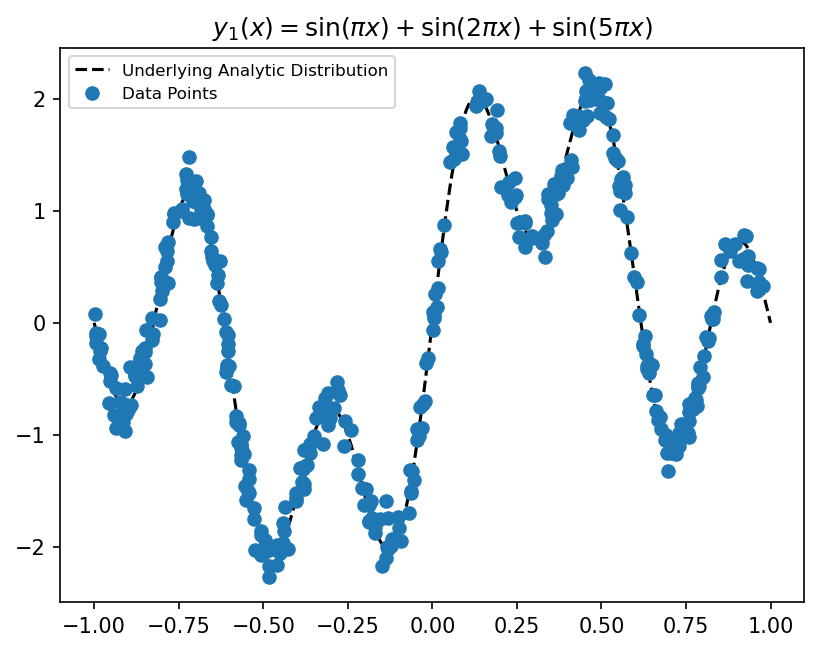

In [3]:
# Visualizing the data:
x_plot = onp.linspace(-1, 1, 401)
pl.figure(dpi = 150)
pl.plot(x_plot, f(x_plot), 'k--', label = 'Underlying Analytic Distribution')
pl.plot(x, y, 'o', label = 'Data Points')
pl.legend(fontsize = 8)
pl.title('$y_1(x) = \sin(\pi x) + \sin(2 \pi x) + \sin(5 \pi x)$')

In [4]:
class BayesianLinearRegression(object):
    def __init__(self, X, y, basis = 'monomial', 
                 basis_order = 2, alpha = 1.0, beta = 1.0):
        
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
        # Getting the feature matrix:
        self.basis       = basis
        self.basis_order = basis_order
        self.Phi         = self.return_feature_matrix(self.X)
        # Store precisions
        self.alpha = alpha
        self.beta  = beta
        # Small jitter for numerically stable matrix inversion
        self.jitter = 1e-8
        
    
    def return_feature_matrix(self, X):
        basis       = self.basis
        basis_order = self.basis_order
        # Creating the basis function matrix:
        if(basis == 'monomial'):
            Phi = (X.reshape(-1, 1))**(jnp.arange(basis_order + 1).reshape(1, -1))

        elif(basis == 'fourier'):
            Phi = jnp.hstack([jnp.zeros([X.size, 1]), 
                              jnp.ones([X.size, 1])])
            # Notion of basis_order in this maybe a little strange since we are
            # considering sin and cos so it's technically 2 * basis_order (??)
            for i in range(1, basis_order + 1):
                Phi = jnp.hstack([Phi, 
                                  jnp.sin(i * jnp.pi * X),
                                  jnp.cos(i * jnp.pi * X)
                                 ])
                
        elif(basis == 'legendre'):
            Phi = jnp.hstack([jnp.ones([X.size, 1]), X])
            # Now using the recurrence relation
            # (n + 1) P_{n + 1}(x) = (2n + 1) x P_n(x) - n P_{n-1}(x)
            for i in range(2, basis_order + 1):
                P_i_minus_one = Phi[:, -1].reshape(-1, 1)
                P_i_minus_two = Phi[:, -2].reshape(-1, 1)
                P_i           = (1 / i) * (  (2 * i - 1) * X * P_i_minus_one
                                           - (i - 1) * P_i_minus_two
                                          )
                # Updating the feature matrix:
                Phi = jnp.hstack([Phi, P_i])
        
        return Phi
        
    # Computes the MLE estimate of the regression weights
    def fit_MLE(self):
        PhiTPhi_inv = jnp.linalg.inv(  jnp.matmul(self.Phi.T, self.Phi)
                                     + self.jitter * jnp.eye(self.Phi.shape[1])
                                    )
        PhiTy       = jnp.matmul(self.Phi.T, self.y)
        w_MLE       = jnp.matmul(PhiTPhi_inv, PhiTy)
        self.w_MLE  = w_MLE
        
        return w_MLE

    # Computes the MAP estimate of the regression weights
    def fit_MAP(self):
        Lambda     = jnp.matmul(self.Phi.T, self.Phi) + \
                     (self.beta/self.alpha) * jnp.eye(self.Phi.shape[1])
        Lambda_inv = jnp.linalg.inv(Lambda)
        PhiTy      = jnp.matmul(self.Phi.T, self.y)
        mu         = jnp.matmul(Lambda_inv, PhiTy)
        self.w_MAP = mu
        # Storing parameters for later use:
        self.Lambda_inv = Lambda_inv
        
        return mu, Lambda_inv

    # Computes the predictive posterior distribution
    def predictive_distribution(self, X_star):
        Phi_star  = self.return_feature_matrix(X_star)
        mean_star = jnp.matmul(Phi_star, self.w_MAP)
        var_star  = jnp.eye(Phi_star.shape[0])/self.alpha + \
                    jnp.matmul(Phi_star, jnp.matmul(self.Lambda_inv, Phi_star.T))

        return mean_star, var_star

In [5]:
alpha = 0.5
beta  = 0.1
# Order of Basis:
basis_order = 5
# Defining the models:
model1 = BayesianLinearRegression(x, y, 'monomial', basis_order, alpha, beta)
model2 = BayesianLinearRegression(x, y, 'fourier', basis_order, alpha, beta)
model3 = BayesianLinearRegression(x, y, 'legendre', basis_order, alpha, beta)

In [6]:
# Finding the MLE and MAP estimates:
w1_MLE              = model1.fit_MLE()
w1_MAP, Lambda1_inv = model1.fit_MAP()

w2_MLE              = model2.fit_MLE()
w2_MAP, Lambda2_inv = model2.fit_MAP()

w3_MLE              = model3.fit_MLE()
w3_MAP, Lambda3_inv = model3.fit_MAP()

In [7]:
# Predict at a set of test points
X_star      = jnp.linspace(-1, 1, 1001)[:,None]

y1_pred_MLE = jnp.matmul(model1.return_feature_matrix(X_star), w1_MLE)
y1_pred_MAP = jnp.matmul(model1.return_feature_matrix(X_star), w1_MAP)

y2_pred_MLE = jnp.matmul(model2.return_feature_matrix(X_star), w2_MLE)
y2_pred_MAP = jnp.matmul(model2.return_feature_matrix(X_star), w2_MAP)

y3_pred_MLE = jnp.matmul(model3.return_feature_matrix(X_star), w3_MLE)
y3_pred_MAP = jnp.matmul(model3.return_feature_matrix(X_star), w3_MAP)

In [8]:
# Draw samples from the predictive posterior
num_samples = 100

mean1_star, var1_star = model1.predictive_distribution(X_star)
mean2_star, var2_star = model2.predictive_distribution(X_star)
mean3_star, var3_star = model3.predictive_distribution(X_star)

samples1 = jax.random.multivariate_normal(rng_key, mean1_star.flatten(), 
                                          var1_star, (num_samples,))
samples2 = jax.random.multivariate_normal(rng_key, mean2_star.flatten(), 
                                          var2_star, (num_samples,))
samples3 = jax.random.multivariate_normal(rng_key, mean3_star.flatten(), 
                                          var3_star, (num_samples,))

percentiles1 = jnp.percentile(samples1, jnp.array([5.0, 95.0]), axis=0)
percentiles2 = jnp.percentile(samples2, jnp.array([5.0, 95.0]), axis=0)
percentiles3 = jnp.percentile(samples3, jnp.array([5.0, 95.0]), axis=0)

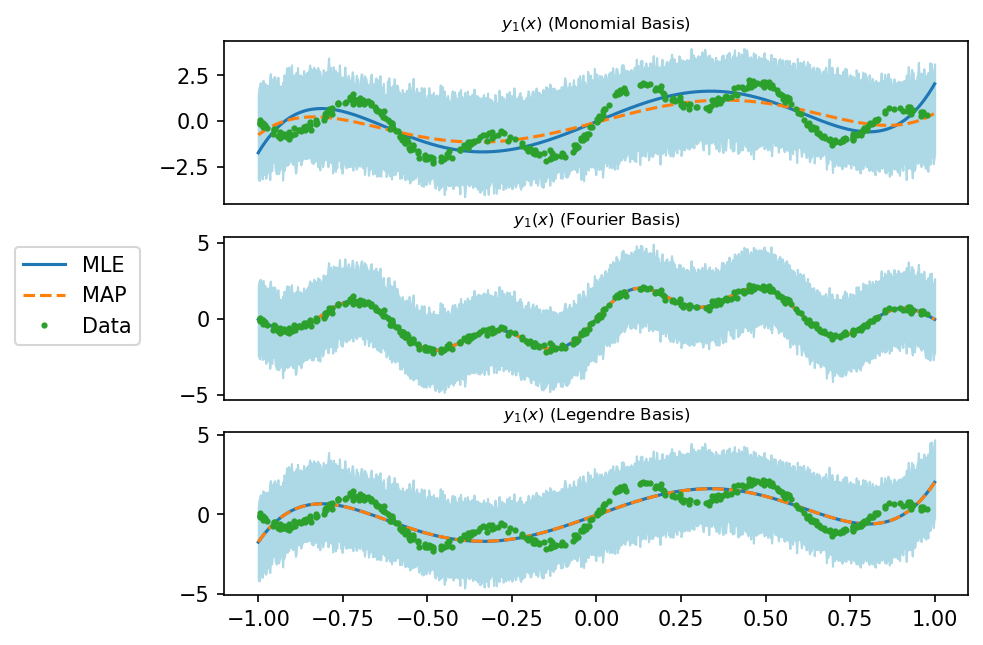

In [9]:
pl.figure(dpi = 150)

pl.subplot(3, 1, 1)
pl.plot(X_star, y1_pred_MLE, label = 'MLE')
pl.plot(X_star, y1_pred_MAP, '--', label = 'MAP')
pl.plot(x, y, 'o', markersize = 2, label = 'Data')
pl.title('$y_1(x)$ (Monomial Basis)', fontsize = 8)
pl.xticks([])
pl.legend(bbox_to_anchor = (-0.1, -0.2))
pl.fill_between(X_star.flatten(), percentiles1[0, :], percentiles1[1, :], color='lightblue')

pl.subplot(3, 1, 2)
pl.plot(X_star, y2_pred_MLE)
pl.plot(X_star, y2_pred_MAP, '--')
pl.plot(x, y, 'o', markersize = 2)
pl.title('$y_1(x)$ (Fourier Basis)', fontsize = 8)
pl.xticks([])
pl.fill_between(X_star.flatten(), percentiles2[0, :], percentiles2[1, :], color='lightblue')

pl.subplot(3, 1, 3)
pl.plot(X_star, y3_pred_MLE)
pl.plot(X_star, y3_pred_MAP, '--')
pl.plot(x, y, 'o', markersize = 2)
pl.title('$y_1(x)$ (Legendre Basis)', fontsize = 8)
pl.fill_between(X_star.flatten(), percentiles3[0, :], percentiles3[1, :], color='lightblue')

In [10]:
# Errors:
print('Monomial (MLE) Error:', jnp.linalg.norm(f(X_star) - y1_pred_MLE) / jnp.linalg.norm(f(X_star)))
print('Monomial (MAP) Error:', jnp.linalg.norm(f(X_star) - y1_pred_MAP) / jnp.linalg.norm(f(X_star)))
print('Fourier (MLE) Error:', jnp.linalg.norm(f(X_star) - y2_pred_MLE) / jnp.linalg.norm(f(X_star)))
print('Fourier (MAP) Error:', jnp.linalg.norm(f(X_star) - y2_pred_MAP) / jnp.linalg.norm(f(X_star)))
print('Legendre (MLE) Error:', jnp.linalg.norm(f(X_star) - y3_pred_MLE) / jnp.linalg.norm(f(X_star)))
print('Legendre (MAP) Error:', jnp.linalg.norm(f(X_star) - y3_pred_MAP) / jnp.linalg.norm(f(X_star)))

Monomial (MLE) Error: 0.5825395
Monomial (MAP) Error: 0.6524904
Fourier (MLE) Error: 0.018587923
Fourier (MAP) Error: 0.019089231
Legendre (MLE) Error: 0.5825279
Legendre (MAP) Error: 0.5822818


It is noted that $y$ is best approximated by the Fourier basis functions since the basis functions capture the underlying data the best. Polynomial features aren't able to represent the underlying data well enough.

## Question 4 [20 Pts]:

Write a logistic regression model to classify the letters from the [EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset) letters dataset. Create an 80/20 train/test split of the data. You've been provided a template to carry this out. Fill in the suitable sections of the code.

- First train your model to perform binary classification between the letters b and d. Visualize performance on the training and test sets using a confusion matrix.
- Next, train your model to perform multiclass classification between b, d, p and q. Visualize performance on the training and test sets using a confusion matrix. 

In [11]:
import torchvision
import jax.numpy as jnp
import jax
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn import metrics

In [12]:
dataset = torchvision.datasets.EMNIST(root='./', split='letters', train=True, download=True)

In [13]:
X = jnp.array(dataset.data)
y = jnp.array(dataset.targets)
# Fill in the code below to get letter b, d, p and q from the dataset
idx_b = jnp.where(y == 2)[0] 
idx_d = jnp.where(y == 4)[0]
idx_p = jnp.where(y == 16)[0]
idx_q = jnp.where(y == 17)[0]

X_b = X[idx_b].reshape(-1, 28*28)
X_d = X[idx_d].reshape(-1, 28*28)
X_p = X[idx_p].reshape(-1, 28*28)
X_q = X[idx_q].reshape(-1, 28*28)
# Combine them below to create datasets for usage in following parts
# create X_bd, Y_bd for binary classification
# create X_bdpq, Y_bdpq for multiclass classification
X_bd = jnp.concatenate((X_b, X_d), axis=0)
y_bd = jnp.concatenate((jnp.zeros(X_b.shape[0]), jnp.ones(X_d.shape[0])), axis=0)

X_bdpq = jnp.concatenate((X_b, X_d, X_p, X_q), axis=0)
y_bdpq = jnp.concatenate((jnp.zeros(X_b.shape[0]), jnp.ones(X_d.shape[0]), 2*jnp.ones(X_p.shape[0]), 3*jnp.ones(X_q.shape[0])), axis=0)

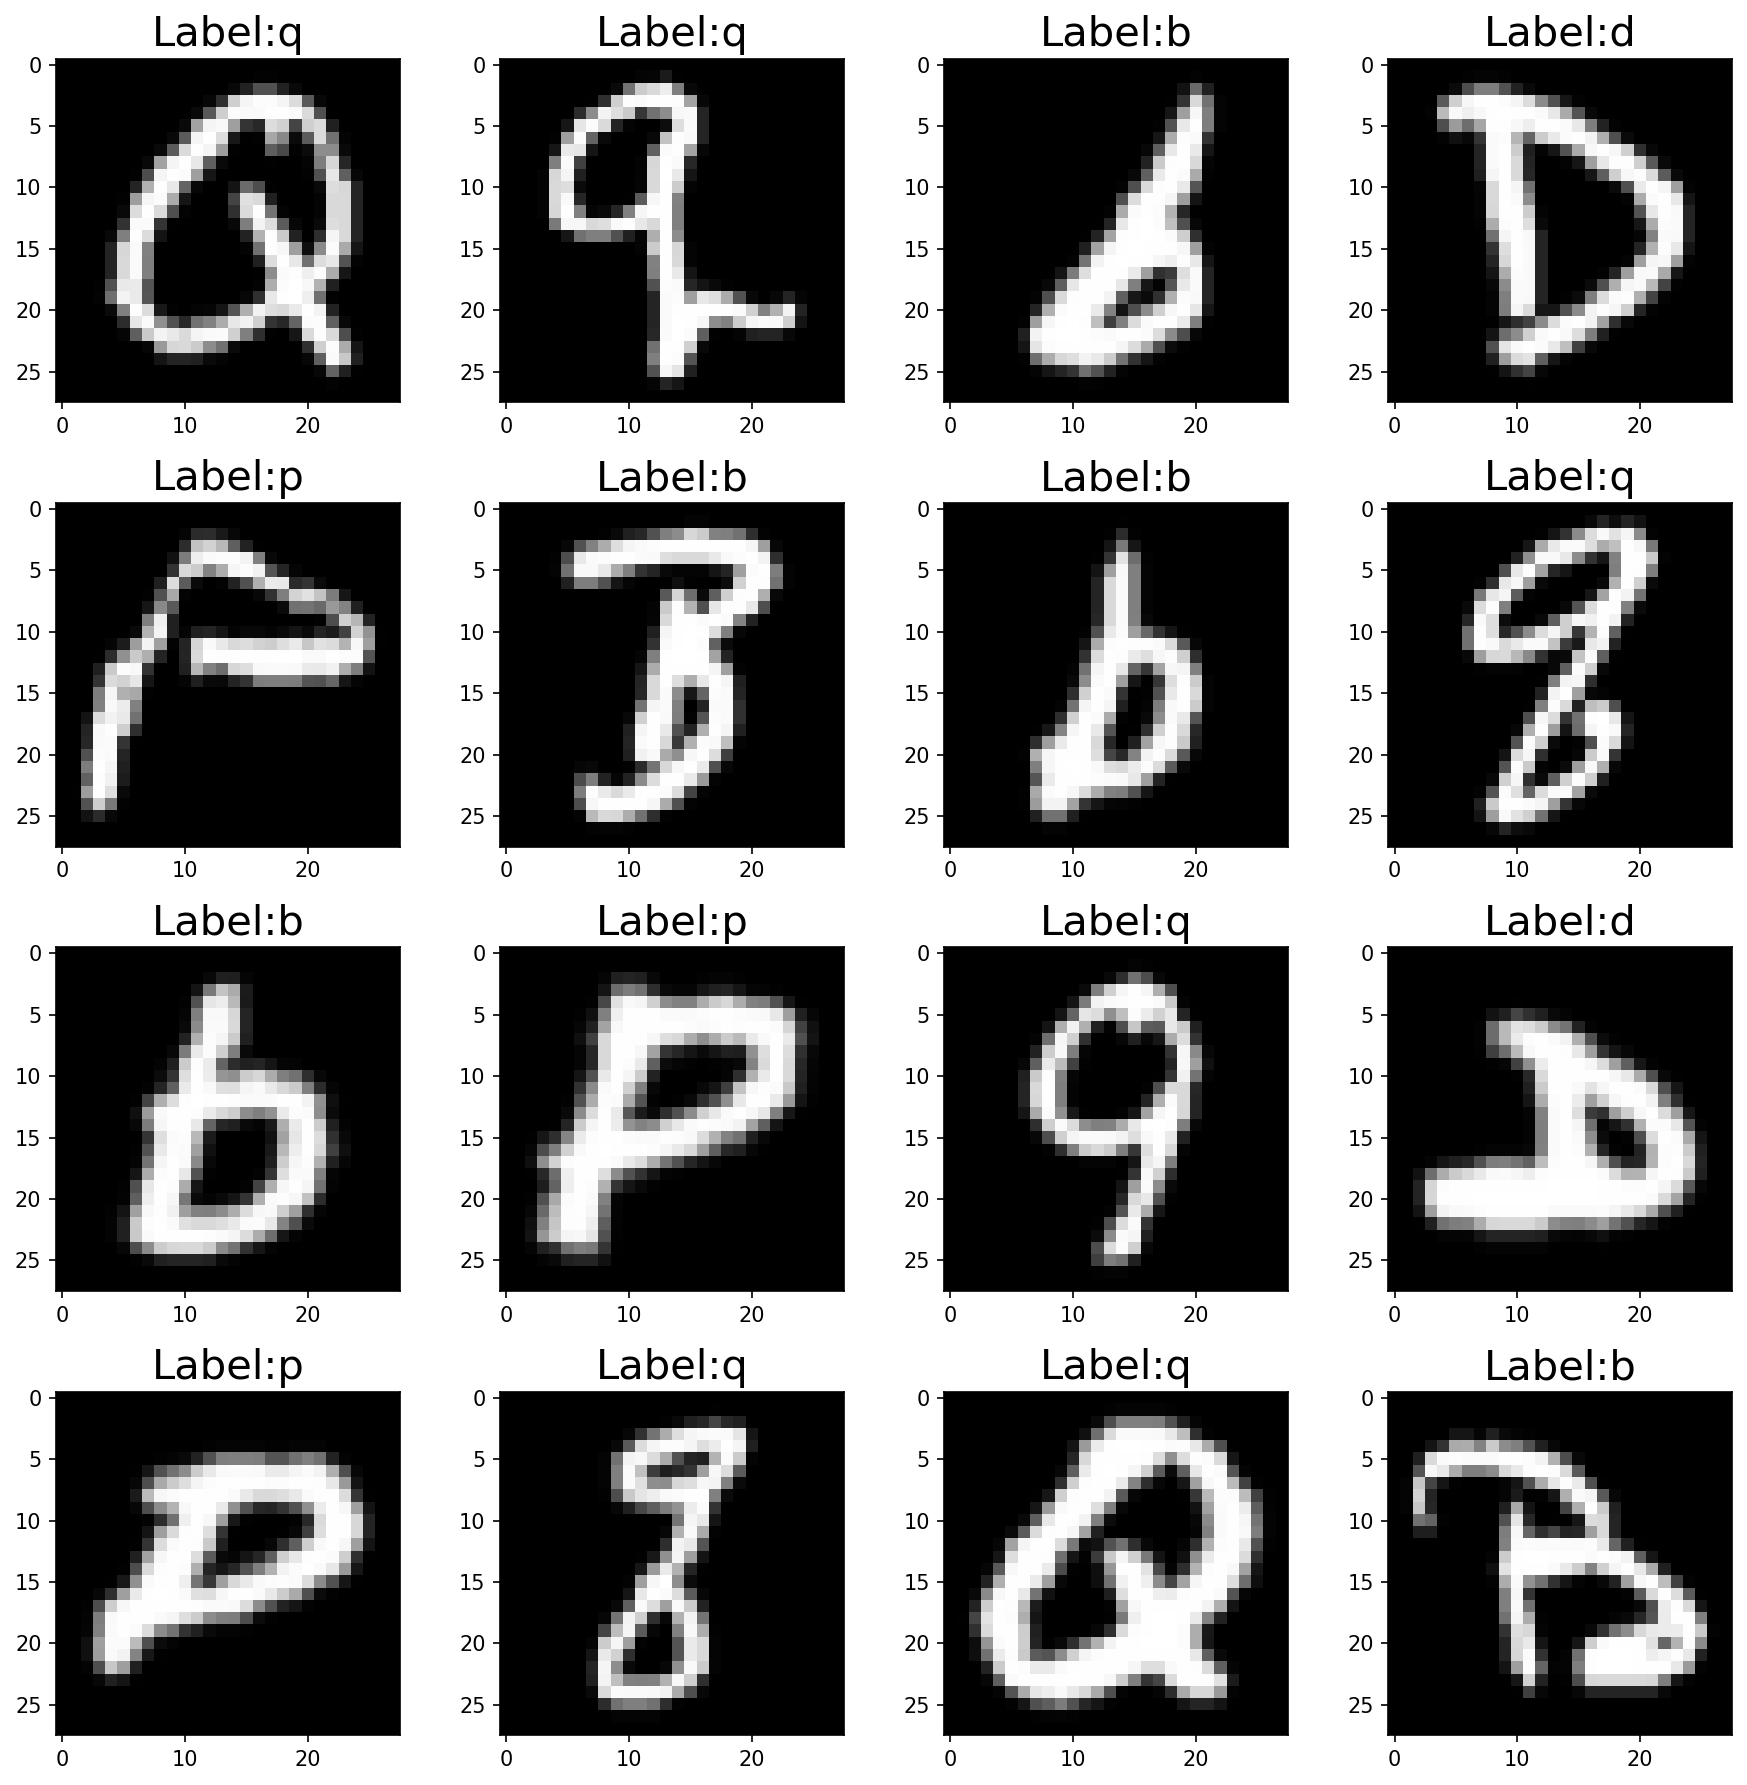

In [14]:
# Check that the mapping was performed correctly by utilizing a few examples:
# Visualizing that your mapping is performed correctly
rnd_idx = jax.random.randint(jax.random.PRNGKey(42), (16,), 0, X_bdpq.shape[0])
# assuming that the labels are mapped as follows: b -> 0, d -> 1, p -> 2, q -> 3 (change if you're using something different)
str_labels = ['b', 'd', 'p', 'q']
pl.figure(dpi = 150, figsize=(12,12))
for index, (image, label) in enumerate(zip(X_bdpq[rnd_idx], y_bdpq[rnd_idx])):
    pl.subplot(4, 4, index + 1)
    pl.imshow(jnp.reshape(image, (28,28)).T, cmap=pl.cm.gray)
    pl.title('Label:' + str_labels[int(label)], fontsize = 20)
pl.tight_layout()

In [15]:
# Fill in the code to perform an 80-20 train-test split on X_bd and y_bd to yield X_train, y_train, X_test, y_test:
idx_train = jax.random.shuffle(jax.random.PRNGKey(0), jnp.arange(X_bd.shape[0]))[:int(0.8*X_bd.shape[0])]
idx_test = jax.random.shuffle(jax.random.PRNGKey(0), jnp.arange(X_bd.shape[0]))[int(0.8*X_bd.shape[0]):]

X_train = X_bd[idx_train].reshape(-1, 28 * 28)
y_train = y_bd[idx_train]
X_test = X_bd[idx_test].reshape(-1, 28 * 28)
y_test = y_bd[idx_test]

/scratch/shyamss/anaconda3/envs/cuttingedge/lib/python3.9/site-packages/jax/_src/random.py:399: FutureWarning: jax.random.shuffle is deprecated and will be removed in a future release. Use jax.random.permutation with independent=True.
  warnings.warn(msg, FutureWarning)


In [16]:
def forward(params, X):
    return jax.nn.sigmoid(X @ params)

@jax.jit
def loss_fn(params, X, y):
    # Number of training examples
    m     = len(y)
    # Small parameter to prevent log from throwing nans
    eps   = 1e-7
    y_hat = forward(params, X)
    loss  = -(   y.T @ jnp.log(y_hat + eps) 
               + (1 - y).T @ jnp.log(1 - y_hat + eps)) / m
    
    return jnp.squeeze(loss)

# Computing Gradients:
grad_loss = jax.jit(jax.grad(loss_fn))

In [17]:
# Initializing weights as zeros:
params = jnp.zeros([784, 1])

# Gradient descent
# Learning Rate
alpha = 5e-6
n_its = 50000

loss_history = [loss_fn(params, X_train, y_train)]
for i in range(n_its):
    g      = grad_loss(params, X_train, y_train)
    params = jax.tree_map(lambda x, g: x - alpha * g, params, g)

    # Track progress:
    loss_history = loss_history + [loss_fn(params, X_train, y_train)]

Text(0.5, 0, 'Number of Iterations')

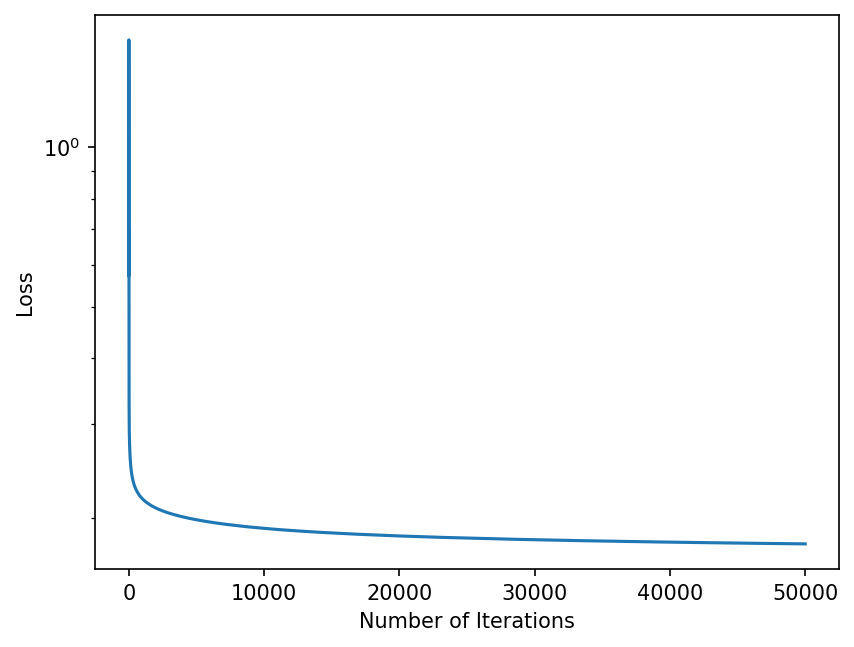

In [18]:
# Plotting the loss history
pl.figure(dpi = 150)
pl.semilogy(loss_history)
pl.ylabel('Loss')
pl.xlabel('Number of Iterations')

In [19]:
# Computing Accuracy Score and Resulting Confusion Matrix for test set:
accuracy_score = (jnp.round(forward(params, X_test)).ravel() == y_test).mean()
cm             = metrics.confusion_matrix(y_test, jnp.round(forward(params, X_test)))
cm_normalized  = cm.astype('float') / cm.sum(axis=1)[:, jnp.newaxis]

print('Accuracy Score on Test Set:', accuracy_score)

Accuracy Score on Test Set: 0.9125


Text(0.5, 1.0, 'Confusion Matrix')

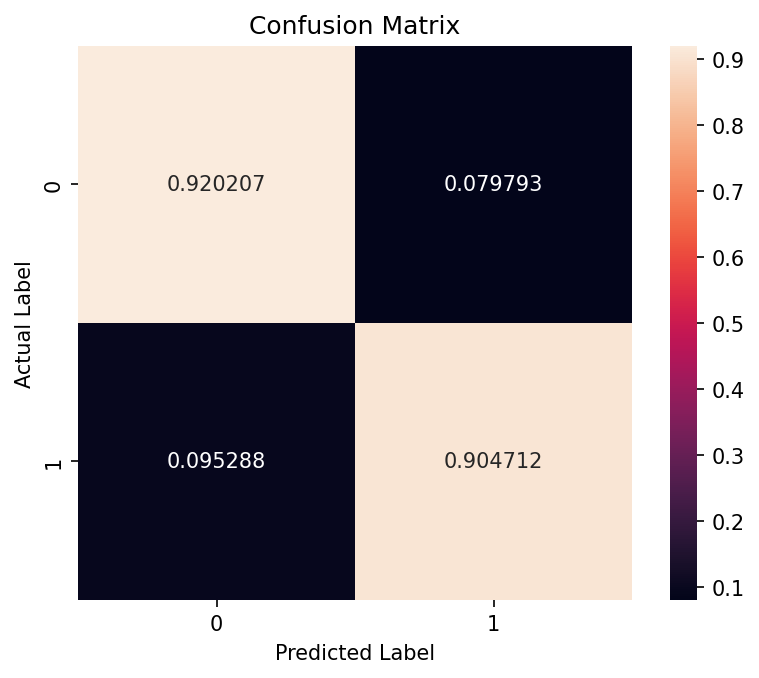

In [20]:
pl.figure(dpi = 150)
sns.heatmap(cm_normalized, fmt = '4f', annot = True, square = True);
pl.ylabel('Actual Label');
pl.xlabel('Predicted Label');
pl.title('Confusion Matrix')

In [21]:
# Fill in the code to perform an 80-20 train-test split on X_bdpq and y_bdpq to yield X_train, y_train, X_test, y_test:
# Remember that you need to be one hot encoding the labels for multiclass classification
# Fill in the code to perform an 80-20 train-test split on X_bd and y_bd to yield X_train, y_train, X_test, y_test:
idx_train = jax.random.shuffle(jax.random.PRNGKey(0), jnp.arange(X_bdpq.shape[0]))[:int(0.8*X_bdpq.shape[0])]
idx_test = jax.random.shuffle(jax.random.PRNGKey(0), jnp.arange(X_bdpq.shape[0]))[int(0.8*X_bdpq.shape[0]):]

X_train = X_bdpq[idx_train].reshape(-1, 28 * 28)
y_train = jax.nn.one_hot(y_bdpq[idx_train], 4)
X_test = X_bdpq[idx_test].reshape(-1, 28 * 28)
y_test = jax.nn.one_hot(y_bdpq[idx_test], 4)

/scratch/shyamss/anaconda3/envs/cuttingedge/lib/python3.9/site-packages/jax/_src/random.py:399: FutureWarning: jax.random.shuffle is deprecated and will be removed in a future release. Use jax.random.permutation with independent=True.
  warnings.warn(msg, FutureWarning)


In [22]:
def forward(params, X):
    return jax.nn.softmax(X @ params)

@jax.jit
def loss_fn(params, X, y):
    # Small parameter to prevent log from throwing nans
    eps   = 1e-7
    y_hat = forward(params, X)
    loss  = -jnp.sum(y * jnp.log(y_hat + eps), axis = 1).mean()
    
    return jnp.squeeze(loss)

# Computing Gradients:
grad_loss = jax.jit(jax.grad(loss_fn))

In [23]:
# Initializing weights as zeros:
params = jnp.zeros([784, 4])

# Gradient descent
# Learning Rate
alpha = 1e-6
n_its = 50000

loss_history = [loss_fn(params, X_train, y_train)]
for i in range(n_its):
    g      = grad_loss(params, X_train, y_train)
    params = jax.tree_map(lambda x, g: x - alpha * g, params, g)

    # Track progress:
    loss_history = loss_history + [loss_fn(params, X_train, y_train)]

Text(0.5, 0, 'Number of Iterations')

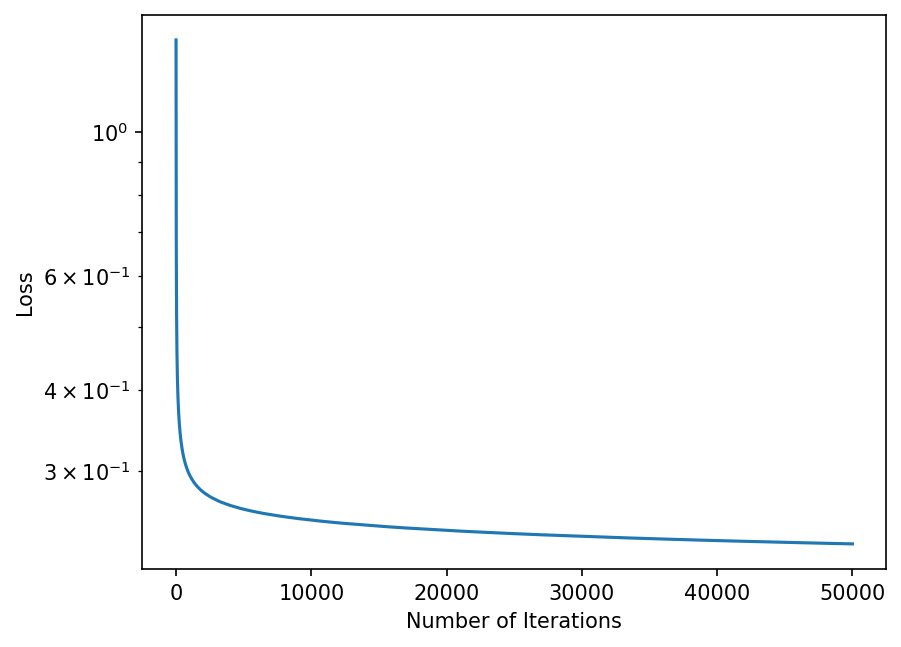

In [24]:
pl.figure(dpi = 150)
pl.semilogy(loss_history)
pl.ylabel('Loss')
pl.xlabel('Number of Iterations')

In [25]:
# Computing Accuracy Score and Resulting Confusion Matrix for test set:
accuracy_score = (jnp.argmax(forward(params, X_test), axis = 1) == 
                  jnp.argmax(y_test, axis = 1)).mean()
cm             = metrics.confusion_matrix(jnp.argmax(y_test, axis = 1), 
                                          jnp.argmax(forward(params, X_test), axis = 1))
cm_normalized  = cm.astype('float') / cm.sum(axis=1)[:, jnp.newaxis]
print('Accuracy Score on Test Set:', accuracy_score)

Accuracy Score on Test Set: 0.90911466


Text(0.5, 1.0, 'Confusion Matrix')

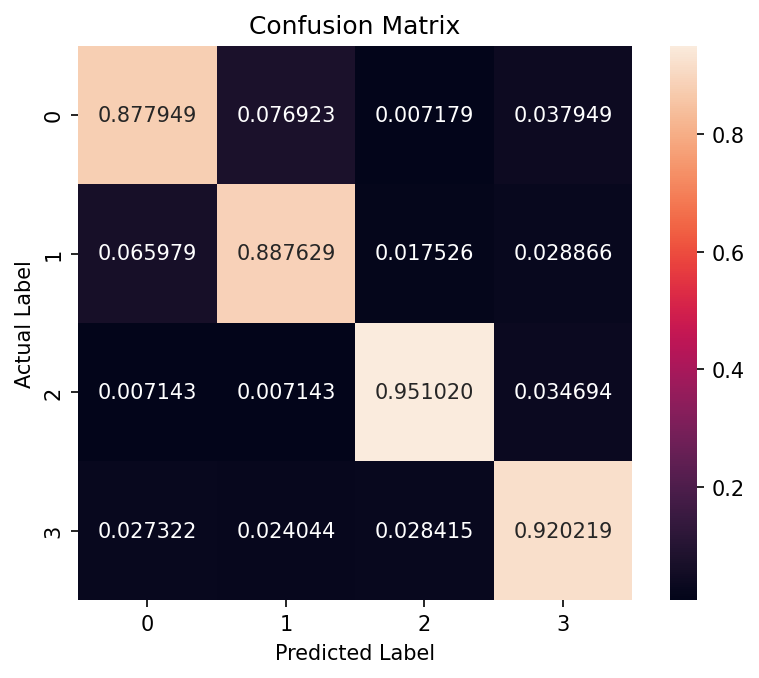

In [26]:
pl.figure(dpi = 150)
sns.heatmap(cm_normalized, fmt = '4f', annot = True, square = True);
pl.ylabel('Actual Label');
pl.xlabel('Predicted Label');
pl.title('Confusion Matrix')

## Question 5 [20 Pts]:
Write Python routines:
- `gradient_descent(f, g, x0, eta)` that performs an iteration of gradient descent on a given function $f(x)$ and its gradient $g(x)$, starting at a given point $x_0$, and using a given step-size $\eta$.
- `newton(f, g, H, x0, eta)` that performs an iteration of Newton's method on a given function $f(x)$, its gradient $g(x)$ and Hessian $H(x)$, starting at a given point $x_0$, and using a given step-size $\eta$.

Do **NOT** use `jax.grad` or `jax.hessian` (you need to define the gradient and Hessian functions). Use those routines in an optimization loop to optimize the following two functions:

- $$f_1(x, y) = x^2 + 100 y^2 $$
- $$f_2(x, y) = (1 - x)^2 + 100(y - x^2)^2,$$

Consider step-sizes $\eta = 0.001, 0.01, 1$. Take your initial starting location as $(-1, 1)$. Comment on the following: 
- What is the effect of step-size on the different problems, and algorithms? 
- When the algorithm does converge, how many steps does it take to reach the minimum?

Give suitable reasons for your observations. Plot the objective function value vs the iterate number, and a plot that shows the progress on a contour plot of the landscape. Use these to support your reasoning.

In [27]:
# Defining the functions
# Quadratic Function:
def f1(X):
    x, y = X
    return x**2 + 100 * y**2

def g1(X):
    x, y = X
    return jnp.array([2 * x, 200 * y])

def H1(X):
    x, y = X
    return jnp.array([[2, 0], [0, 200]])

# Rosenbrock Function
def f2(X):
    x, y = X
    return (1 - x)**2 + 100 * (y - x**2)**2

def g2(X):
    x, y = X
    return jnp.array([400 * x**3 - 400 * x * y + 2 * x - 2, 200 * (y - x**2)])

def H2(X):
    x, y = X
    return jnp.array([[1200 * x**2 - 400 * y + 2, -400 * x], [-400 * x, 200]])

In [28]:
@functools.partial(jax.jit, static_argnums = (0, 1, 2, 4))
def gradient_descent(f, g, H, X, eta):
    # Given function f, grad g, hessian H (unused), location X_i and stepsize eta 
    # this function performs one step of newton descent to return X_{i + 1}
    return X - eta * g(X)

@functools.partial(jax.jit, static_argnums = (0, 1, 2, 4))
def newtons_method(f, g, H, X, eta):
    # Given function f, grad g, hessian H, location X_i and stepsize eta 
    # this function performs one step of newton descent to return X_{i + 1}
    return X - eta * jnp.linalg.inv(H(X)) @ g(X)

In [29]:
def perform_optimization(opt, f, g, H, X0, eta, max_its, tolerance):
    # Setting X initially:
    X = X0
    # Setting lists to track progress:
    X_history = [X]
    f_history = [f(X)]
    its       = 0
    while(f(X) > tolerance and its < max_its):
        X = opt(f, g, H, X, eta)
        # Tracking variables:
        X_history.append(X)
        f_history.append(f(X))
        # Updating the iteration counter:
        its += 1
    
    return jnp.array(f_history), jnp.array(X_history)

In [30]:
X0          = jnp.array([-1., 1.])
# Maximum number of iterations to try:
max_its     = 5000
# Setting tolerance for termination:
tolerance   = 1e-6

In [31]:
# Setting step-size:
eta = 0.001
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

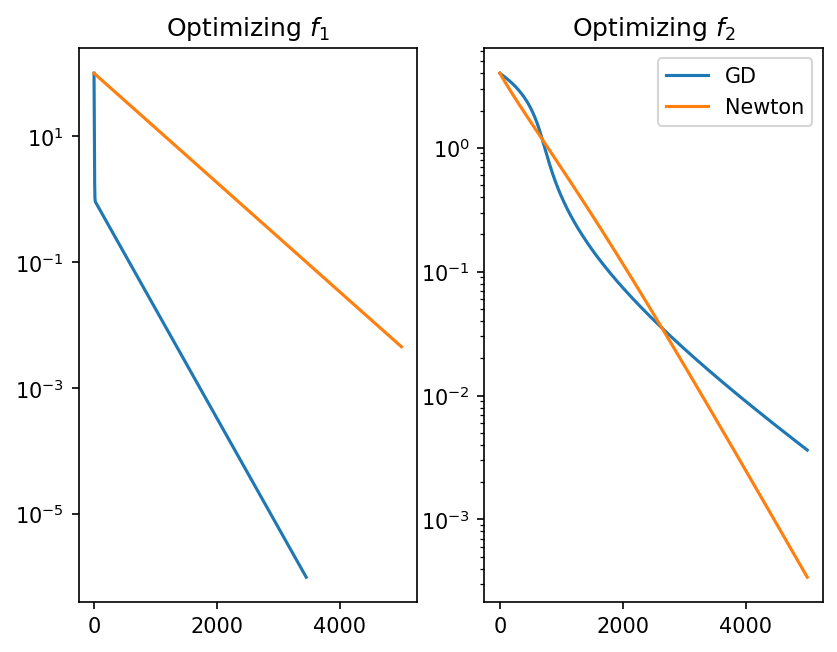

In [32]:
pl.figure(dpi = 150)
pl.subplot(1, 2, 1)
pl.semilogy(f1_gd, label = 'GD')
pl.semilogy(f1_newton, label = 'Newton')
pl.title('Optimizing $f_1$')

pl.subplot(1, 2, 2)
pl.semilogy(f2_gd, label = 'GD')
pl.semilogy(f2_newton, label = 'Newton')
pl.title('Optimizing $f_2$')
pl.legend()

In [33]:
x, y = jnp.meshgrid(jnp.linspace(-1.5, 1.5, 301), jnp.linspace(-1.5, 1.5, 301))

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

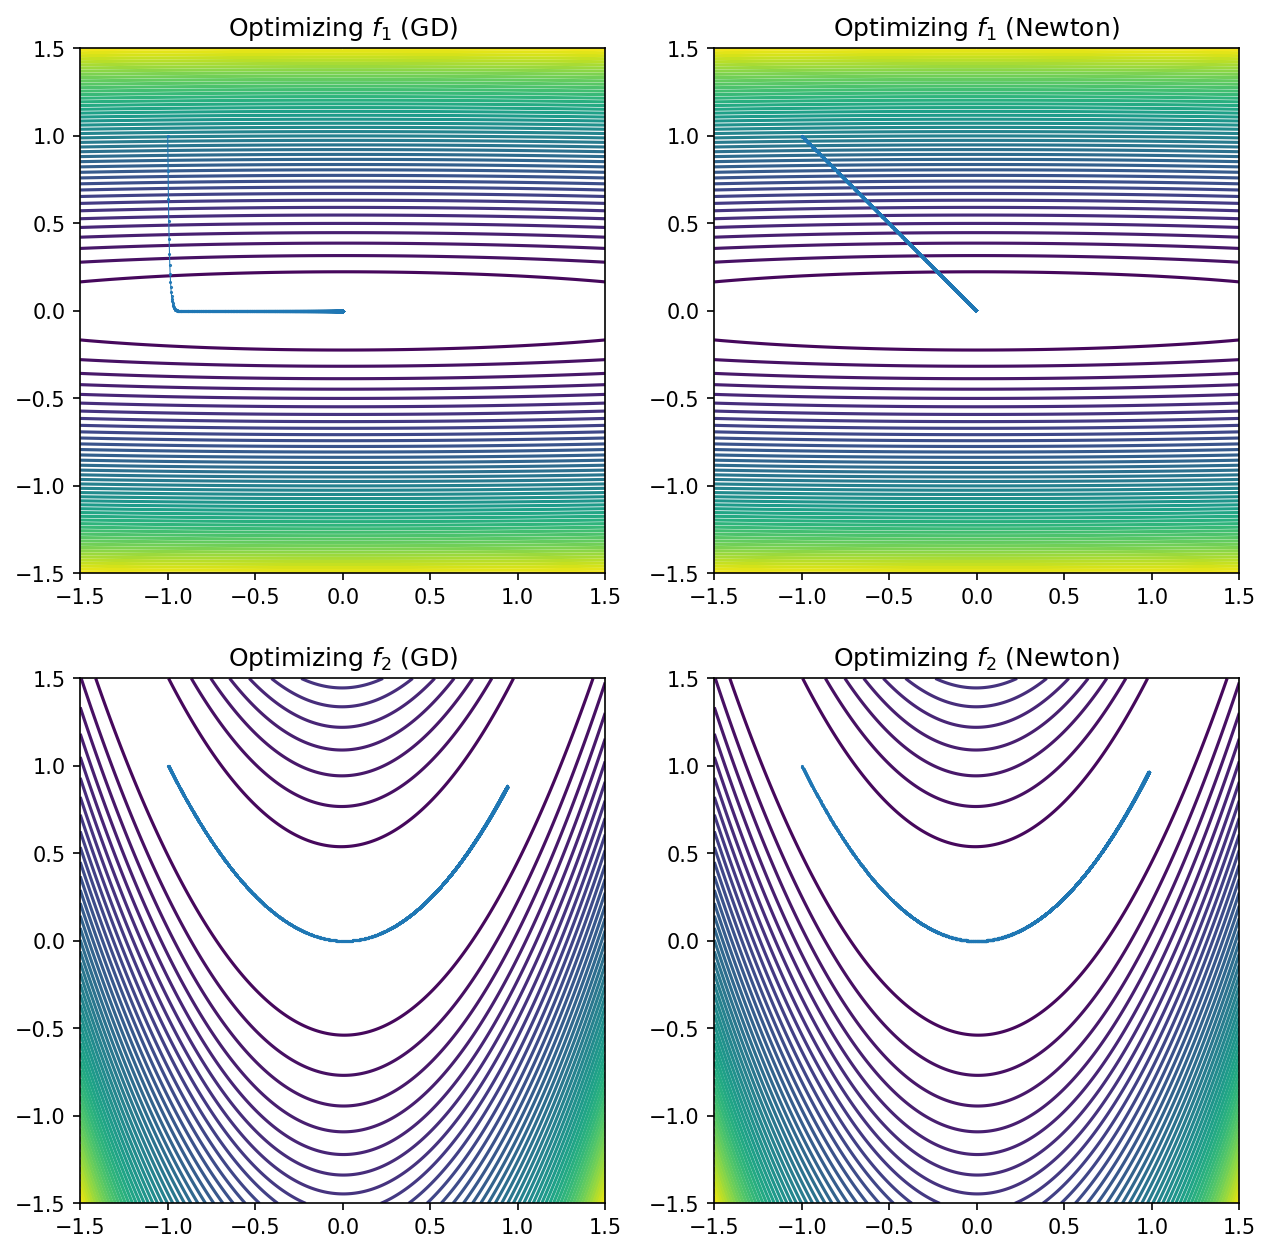

In [34]:
pl.figure(dpi = 150, figsize = (10, 10))
pl.subplot(2, 2, 1)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_gd[:, 0], X1_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (GD)')

pl.subplot(2, 2, 2)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (Newton)')

pl.subplot(2, 2, 3)
pl.contour(x, y, f2([x, y]), 50)
pl.plot(X2_gd[:, 0], X2_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_2$ (GD)')

pl.subplot(2, 2, 4)
pl.contour(x, y, f2([x, y]), 50)
pl.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_2$ (Newton)')

As one can observe, gradient descent moves perpendicular to the contour lines. However, this may not necessarily be the best search direction. For $f_1$, clearly the direction picked by Newton's method is the one that's the shortest path to reach the minimum. For this function, since we have considered a step-size of $\eta = 0.001$ we don't see a significant improvement over GD (here it's worse for the choice of step-size for $f_1$). However, it really begins to shine with the right step-size. While, $\eta = 0.001$ works really well for gradient descent. Actually, as you'll see in the later case of $\eta = 1$, Newton's method converges in a single step. This is due to the fact Newton's method is an optimization method is based on a quadratic approximation of the function. Hence, for the quadratic function it'll yield an exact solution. Another interesting property of the Newton's method is its [affine invariance](https://www.stat.cmu.edu/~ryantibs/convexopt-S15/scribes/14-newton-scribed.pdf#page=3). In contrast, gradient descent struggles when dealing with poorly scaled landscapes

The Rosenbrock function on the other hand is a rather challenging problem, and is often used as a test problem for optimization algorithms. The challenge lies in the fact that the minimum is hiding in the valley which is easy to arrive at. However, it is notoriously difficult (slow) to reach the correct minimum. With this step-size, both methods make very slow progress in arriving at the minimum.

In [35]:
# Setting step-size:
eta = 0.01
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

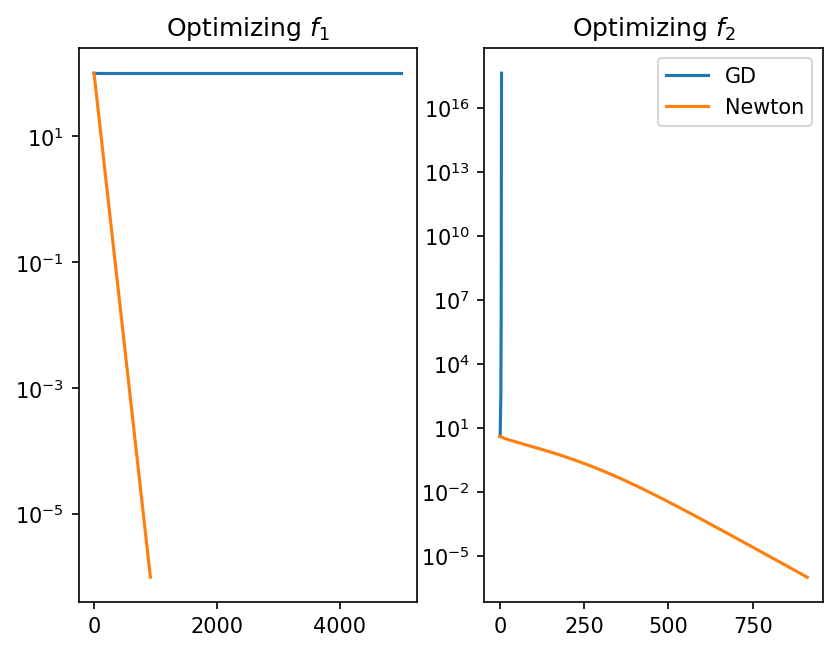

In [36]:
pl.figure(dpi = 150)
pl.subplot(1, 2, 1)
pl.semilogy(f1_gd, label = 'GD')
pl.semilogy(f1_newton, label = 'Newton')
pl.title('Optimizing $f_1$')

pl.subplot(1, 2, 2)
pl.semilogy(f2_gd, label = 'GD')
pl.semilogy(f2_newton, label = 'Newton')
pl.title('Optimizing $f_2$')
pl.legend()

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

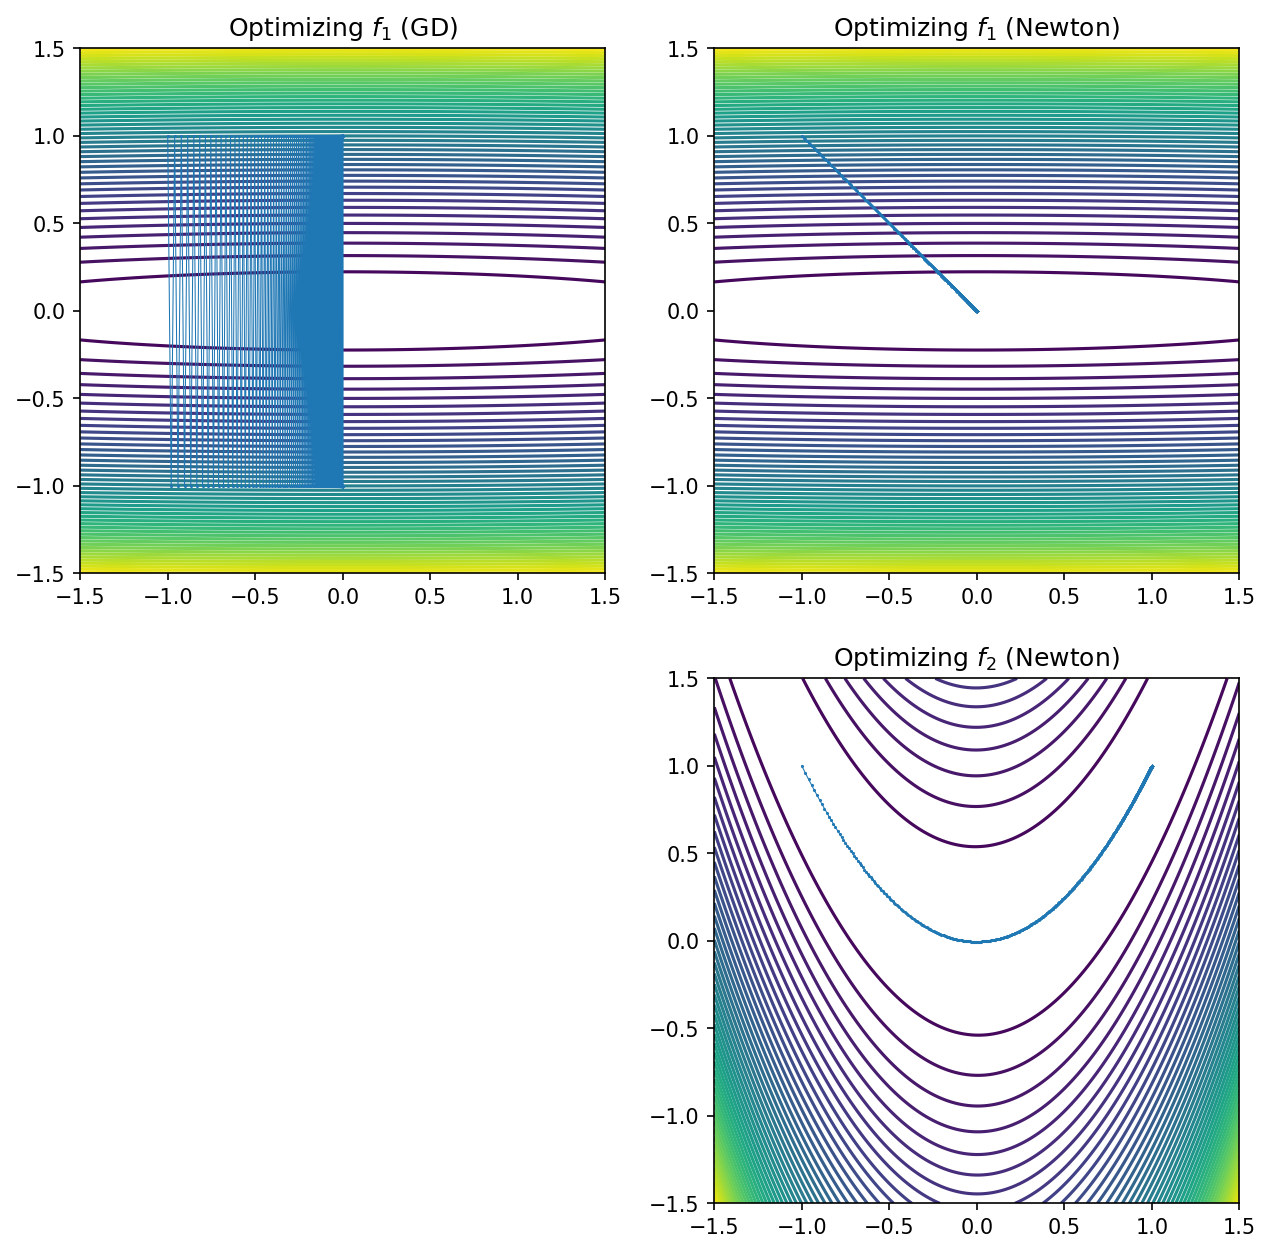

In [37]:
pl.figure(dpi = 150, figsize = (10, 10))
pl.subplot(2, 2, 1)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_gd[:, 0], X1_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (GD)')

pl.subplot(2, 2, 2)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (Newton)')

# Skipping this!
# NOTE: As we can see the choice of stepsize results in GD to blow up!
# pl.subplot(2, 2, 3)
# pl.contour(x, y, f2([x, y]), 50)
# pl.plot(X2_gd[:, 0], X2_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
# pl.gca().set_aspect('equal')
# pl.title('Optimizing $f_2$ (GD)')

pl.subplot(2, 2, 4)
pl.contour(x, y, f2([x, y]), 50)
pl.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_2$ (Newton)')

Due to the large scaling term in $y$, GD just ends up bouncing back and forth between the contourlines at $y = \pm 1$, and fails to ever reach the minimum:
\begin{align}
    \nabla f_1(x, y) &= (2 x, 200 y) \\
    \implies \eta \nabla f_1(x, y) &= (0.02 x, 2 y) \\
    (x_1, y_1) &= (x_0, y_0) - \eta \nabla f_1(x_0, y_0) = (-1, 1) - (-0.02, 2) = (-0.98, -1) \\
    (x_2, y_2) &= (x_1, y_1) - \eta \nabla f_1(x_1, y_1) = (-0.98, -1) - (-0.0196, -2) = (-0.9604, 1) \\
    \vdots
\end{align}

Similarly, we notice that GD blows up when trying the optimize the Rosenbrock function. Clearly, for our problems $\eta \geq 0.01$ wouldn't work well. However, Newton's method does well in arriving at the minimum.

In [38]:
# Setting step-size:
eta = 1
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

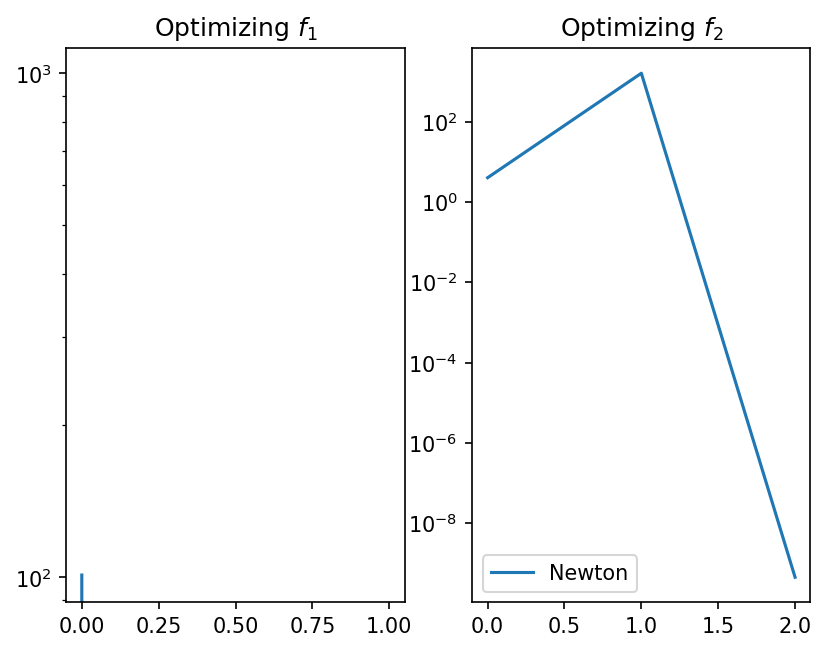

In [39]:
pl.figure(dpi = 150)
pl.subplot(1, 2, 1)
# pl.semilogy(f1_gd, label = 'GD')
pl.semilogy(f1_newton, label = 'Newton')
pl.title('Optimizing $f_1$')

pl.subplot(1, 2, 2)
# pl.semilogy(f2_gd, label = 'GD')
pl.semilogy(f2_newton, label = 'Newton')
pl.title('Optimizing $f_2$')
pl.legend()

In [40]:
x2, y2 = jnp.meshgrid(jnp.linspace(-1.5, 1.5, 301), jnp.linspace(-3.5, 3.5, 701))

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

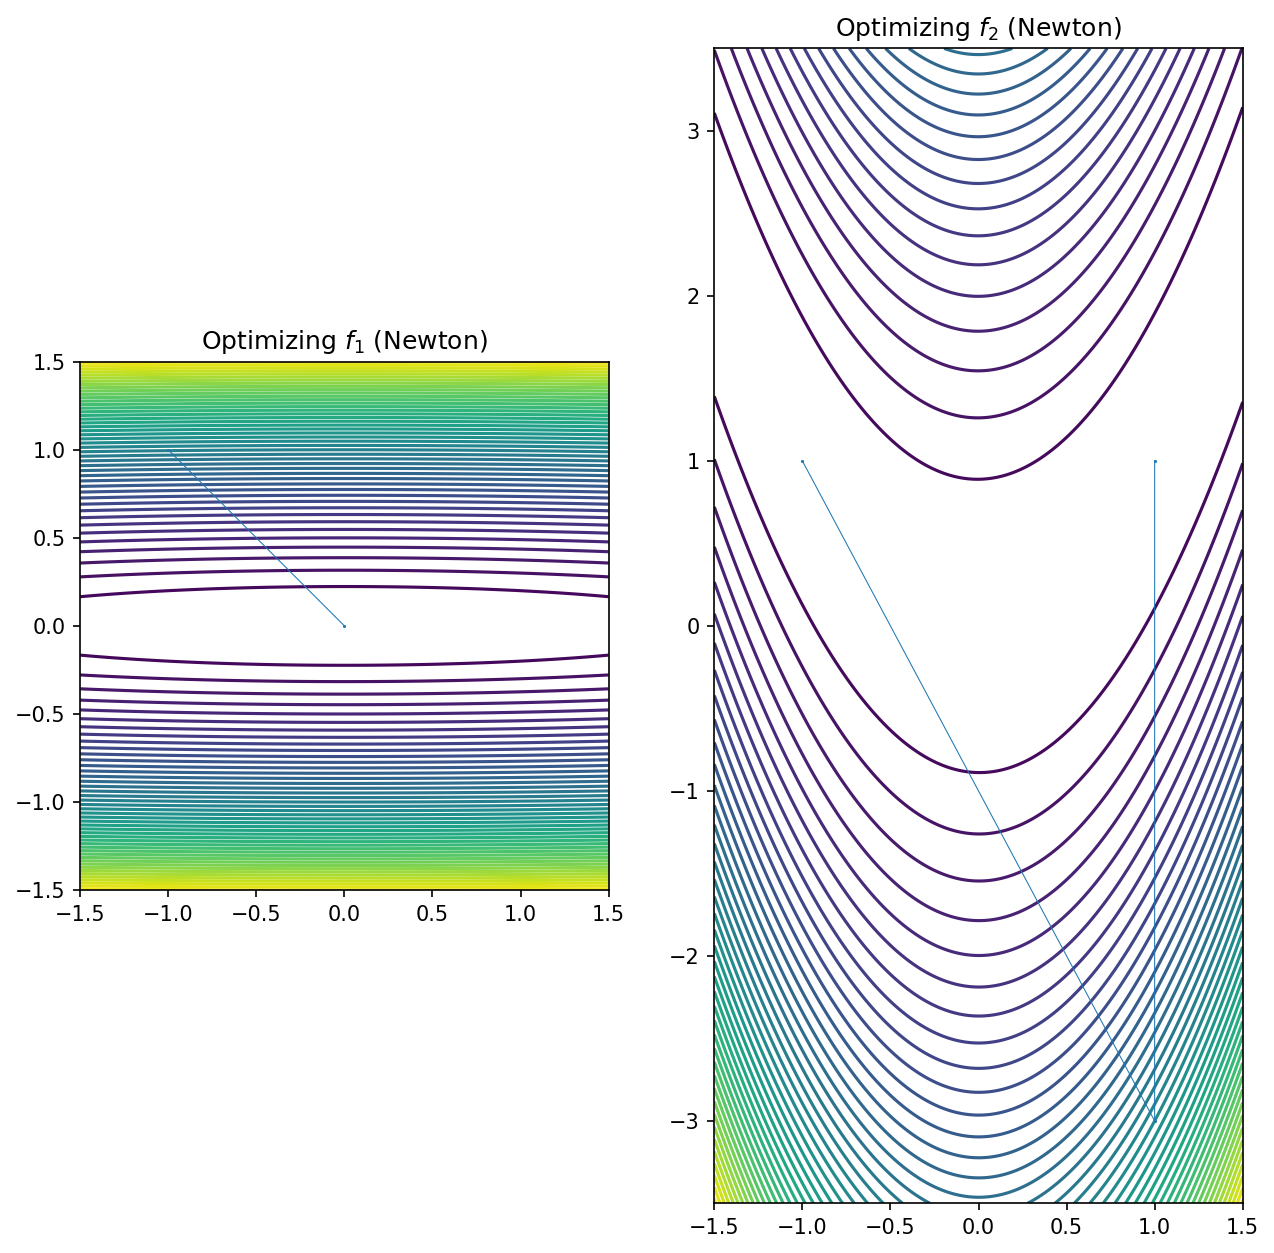

In [41]:
# Skipping this!
# NOTE: As we can see the choice of stepsize results in GD to blow up!
pl.figure(dpi = 150, figsize = (10, 10))
pl.subplot(1, 2, 1)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (Newton)')

pl.subplot(1, 2, 2)
pl.contour(x2, y2, f2([x2, y2]), 50)
pl.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.title('Optimizing $f_2$ (Newton)')

As mentioned earlier, you can see that Newton arrives at the minimum in a single step for the scaled quadratic function. Even for the Rosenbrock function, we arrive at the true minimum in 2 steps. So the choice of $\eta = 1$ does incredibly well